# Consutomer Transaction Prediction

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
import joblib

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis

In [2]:
#importing dataset into notebook
df = pd.read_csv('C:/Users/sat03/santander-customer-transaction-prediction/train.csv')
print("Number of datapoints:", df.shape[0])
print("Number of features:", df.shape[1])
print("Class", df.target.unique())
df.head()

Number of datapoints: 200000
Number of features: 202
Class [0 1]


ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [4]:
df.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [6]:
#checking for nul values if any
df.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [7]:
#Printing Class distribution
print(df.shape)
df['target'].value_counts(normalize = True)

(200000, 202)


0    0.89951
1    0.10049
Name: target, dtype: float64

Text(0.5, 1.0, 'Count plot for Target')

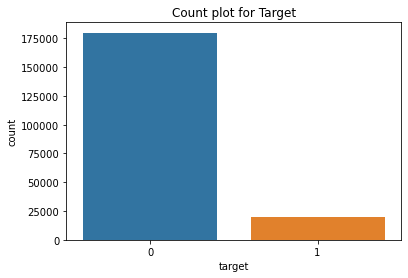

In [8]:
#Plotting Class distribution
sns.countplot(data = df, x = 'target').set_title('Count plot for Target')

## Feature Selection using Variance Threshold

In [9]:
#dropping off non-numerical columns to perform Variance Threshold
df_sel = df.drop(labels = ['ID_code'], axis = 1)

In [10]:
#Using Variance Threshold from sklearn and setting the threshold to 0 in order to find features with constant values if any
sel = VarianceThreshold()
sel.fit(df_sel)

VarianceThreshold()

In [11]:
#Using sumover get_support to determine number of non-constant features
sum(sel.get_support())
#We see that none of the feature has any constant value

201

In [12]:
#Checking if any quasi-constant 99% of dataset features are present in our dataset 
sel = VarianceThreshold(threshold = 0.01)
sel.fit(df_sel)

VarianceThreshold(threshold=0.01)

In [13]:
sum(sel.get_support())
#We see that one feature has constant values over 99% of the data points

200

In [14]:
#Printing the feature that has 99% of data as a constant value and thus can be removed
print([x for x in df_sel.columns if x not in df_sel.columns[sel.get_support()]])

['var_68']


In [15]:
df['var_68'].describe()

count    200000.000000
mean          5.018893
std           0.007186
min           4.993800
25%           5.014000
50%           5.019100
75%           5.024100
max           5.046900
Name: var_68, dtype: float64

In [16]:
#Calculating the ANOVA f-statitic of each feature in order to rank them based on importance
df_data = df.drop(labels = ['ID_code', 'target'], axis = 1)
df_target = df['target']
f_value, p_value = f_classif(df_data, df_target)

In [17]:
feature_imp = pd.DataFrame(f_value, df_data.columns, columns = ['f_value'])
feature_imp_sorted = feature_imp.sort_values(by = ['f_value'], ascending = False)

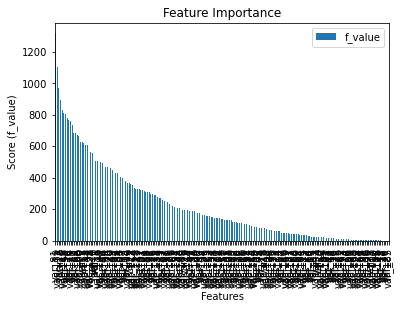

In [18]:
#Plotting features in descending order of its importance(F_value)
feature_imp_sorted.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Score (f_value)')
plt.show()

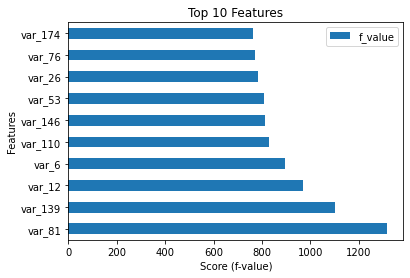

In [19]:
#Computing the top n features and plotting a bar graph againts its F-statistic score 
n=10
top_n_features = feature_imp_sorted[:n]
top_n_features.plot(kind='barh')
plt.title('Top 10 Features')
plt.xlabel('Score (f-value)')
plt.ylabel('Features')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

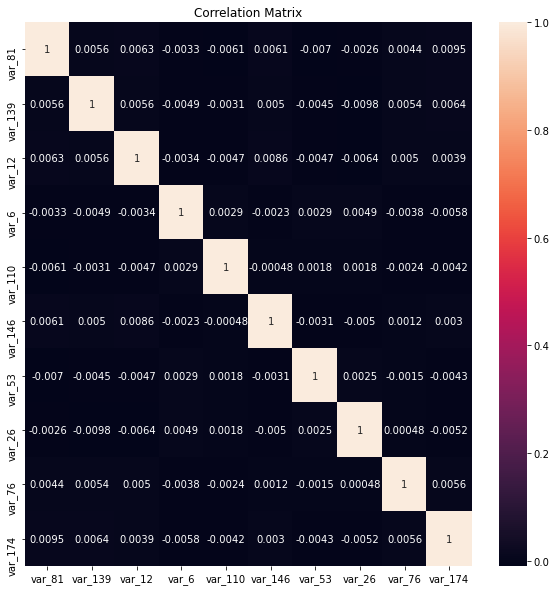

In [20]:
#Computing the correlation matrix of top n features
top_n_features_lst = top_n_features.index
cor = df[top_n_features_lst].corr()
plt.figure(figsize = (10,10))
sns.heatmap(cor, annot = True).set_title('Correlation Matrix')

100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


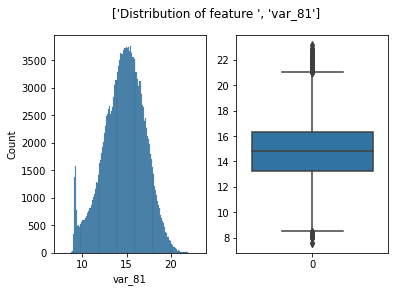

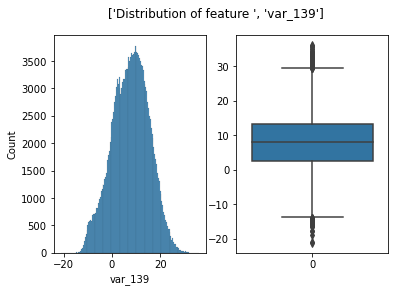

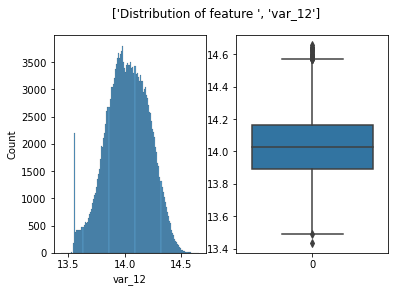

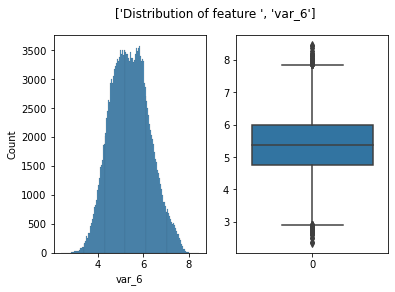

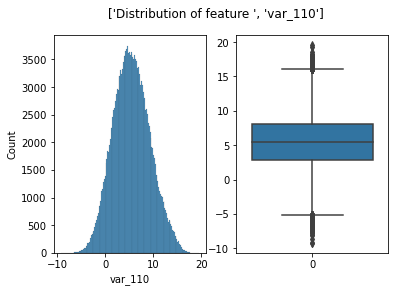

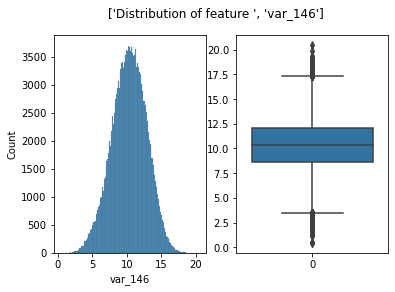

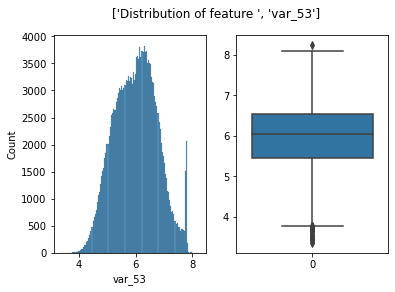

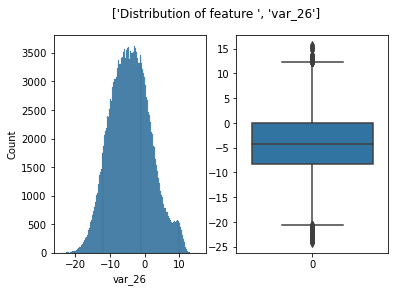

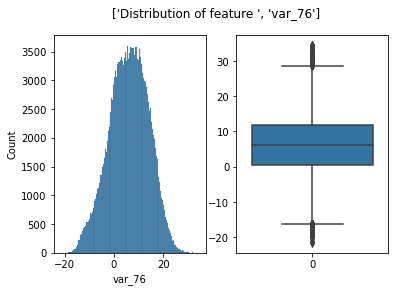

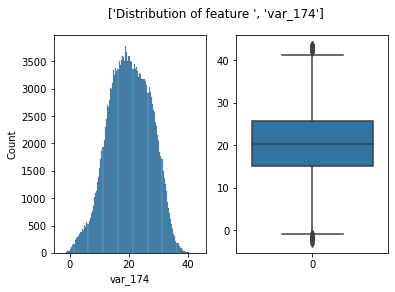

In [21]:
#Plotting histogram and box plot side by side for all the top selected features
for n in tqdm.tqdm(range(len(top_n_features_lst))):
    fig, ax =plt.subplots(1,2)
    sns.histplot(df[top_n_features_lst[n]], ax=ax[0])
    sns.boxplot(data=df[top_n_features_lst[n]], ax=ax[1])
    fig.suptitle(['Distribution of feature ', top_n_features_lst[n]])
    fig.show()

Text(0.5, 0.98, '2D Pair plot of top 5 important features')

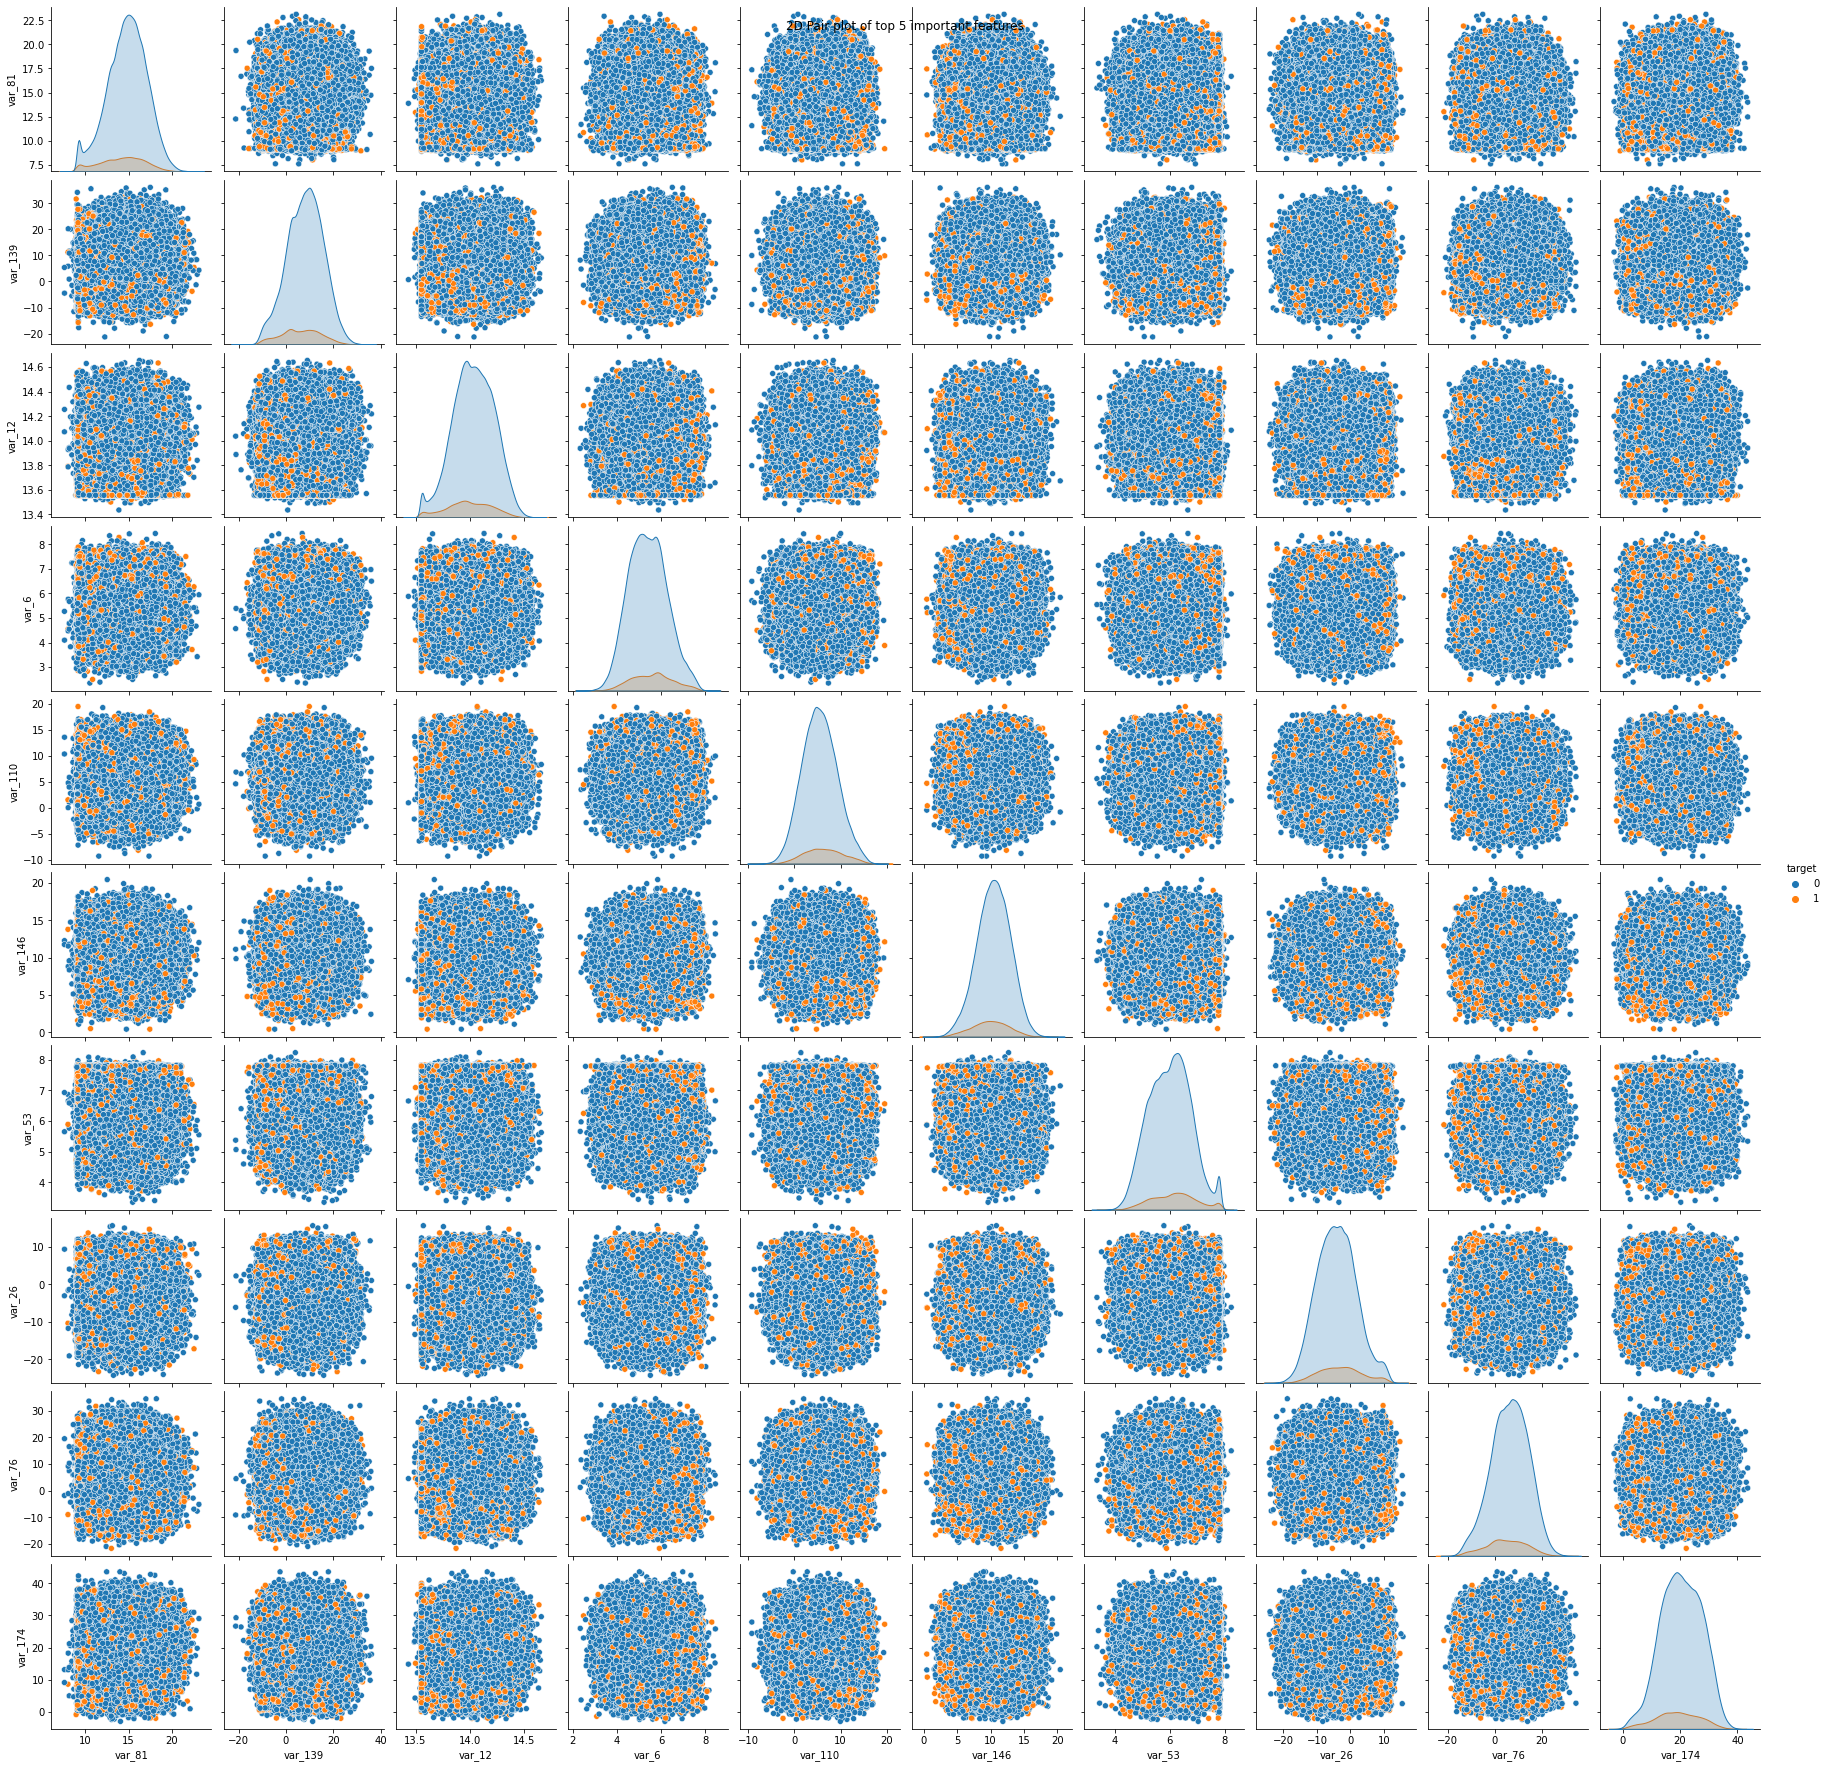

In [ ]:
#Plotting a pair plot between the top selected features
sns.pairplot(df, vars=top_n_features_lst, hue='target').fig.suptitle('2D Pair plot of top 5 important features')

## Data Visualization using PCA

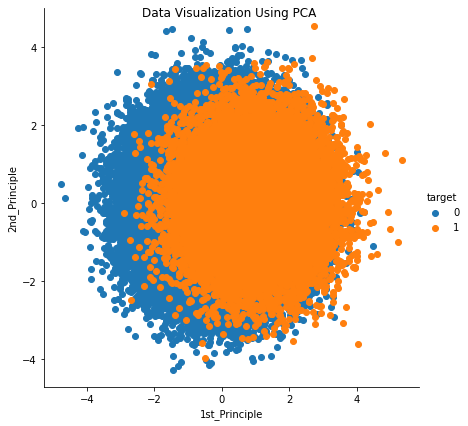

In [22]:
#standardizing the dataset before performing PCA/TSNE
X = df.drop(labels = ['ID_code', 'target'], axis = 1)
std_X = StandardScaler().fit_transform(X)

#Fitting PCA on dataset and reducing it to 2-dimensions for visualization
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(std_X)
df_pca_transformed = pd.DataFrame(data=df_pca, columns=("1st_Principle", "2nd_Principle"))

df_pca_labeled  = pd.concat([df_pca_transformed, df[['target']]], axis = 1)

#Plotting PCA transformed dataset
sns.FacetGrid(df_pca_labeled, hue='target', height=6).map(plt.scatter, '1st_Principle', '2nd_Principle').add_legend().fig.suptitle('Data Visualization Using PCA')
plt.show()

## Data Visualization using TSNE

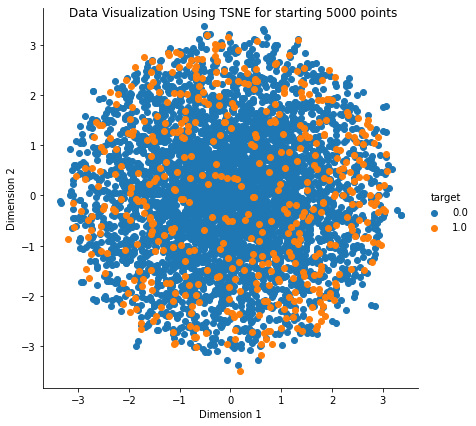

In [ ]:
#implementing TSNE with top 5000 data points as using the whole datset would be computationally expensive
X_5000 = std_X[0:5000,:]
l_5000 = df['target'][0:5000]
model = TSNE(n_components = 2, random_state = 0, perplexity = 50, n_iter = 1000, init = 'pca')
tsne_data = model.fit_transform(X_5000)

tsne_data = np.vstack((tsne_data.T, l_5000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns = ("Dimension 1", "Dimension 2", "target"))

sns.FacetGrid(tsne_df, hue = 'target', height = 6).map(plt.scatter, 'Dimension 1', 'Dimension 2').add_legend().fig.suptitle('Data Visualization Using TSNE for starting 5000 points')
plt.show()

## Modeling

In [3]:
#Function to plot ROC Curve and Confusion Matrix
def plot_results(y_test, pred, pred_prob):    
    #claculate AUC of ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob[:,1])
    print('AUC of ROC curve is: ', metrics.auc(fpr, tpr))
    print(metrics.classification_report(y_test, pred))
    #plot confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, pred)
    metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix).plot().ax_.set_title('Confusion Matrix') 
    plt.show()

In [4]:
#Function to obtain misclassified data points
def get_misclassified(df, x_test, y_test, pred):
    df_xtest = np.column_stack((x_test, y_test, pred))
    col = np.array(df.columns[2:].values).tolist() + ['target', 'prediction']
    df_xtest = pd.DataFrame(df_xtest, columns=col)
    df_misclassified = df_xtest.loc[df_xtest['target'] != df_xtest['prediction']]
    df_correctly_classified = df_xtest.loc[df_xtest['target'] == df_xtest['prediction']]
    
    return df_misclassified, df_correctly_classified

### Baseline Model - Logistic Regression

In [5]:
#Standardizing and Splitting the dataset into train and test set in the ratio of 80:20
y_true = df['target'].values
df_model = df.drop(['ID_code', 'target'], axis=1)
df_model = StandardScaler().fit_transform(df_model)

x_train, x_test, y_train, y_test = train_test_split(df_model, y_true, stratify=y_true, test_size=0.2)

AUC of ROC curve is:  0.8563957519240929
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.69      0.27      0.39      4020

    accuracy                           0.91     40000
   macro avg       0.81      0.63      0.67     40000
weighted avg       0.90      0.91      0.90     40000



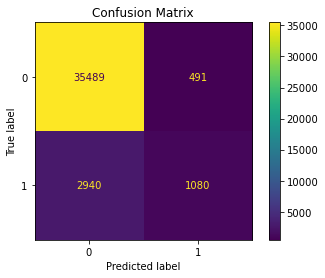

In [26]:
#Buiding a Logistic Regression model as baseline model using default parameters
base_model = LogisticRegression()
base_model.fit(x_train, y_train)

pred = base_model.predict(x_test)
pred_prob = base_model.predict_proba(x_test)

plot_results(y_test, pred, pred_prob)

AUC of ROC curve is:  0.8561232677634618
              precision    recall  f1-score   support

           0       0.97      0.78      0.87     35980
           1       0.28      0.77      0.41      4020

    accuracy                           0.78     40000
   macro avg       0.63      0.78      0.64     40000
weighted avg       0.90      0.78      0.82     40000



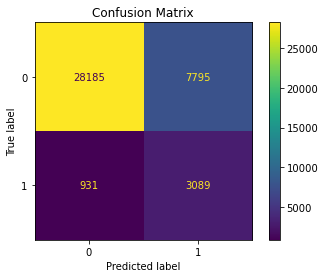

In [27]:
#Buiding a Logistic Regression model as baseline model by balancing class weights
base_model = LogisticRegression(class_weight='balanced')
base_model.fit(x_train, y_train)

pred = base_model.predict(x_test)
pred_prob = base_model.predict_proba(x_test)

plot_results(y_test, pred, pred_prob)

In [30]:
#Finding the best lambda (C) using Grid Search
tuned_parameters = [{'C': [10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}]
grd_srch = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
grd_srch.fit(x_train, y_train)

print(grd_srch.best_estimator_)

LogisticRegression(C=10)


AUC of ROC curve is:  0.8621943299068858
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.69      0.27      0.39      4020

    accuracy                           0.91     40000
   macro avg       0.81      0.63      0.67     40000
weighted avg       0.90      0.91      0.90     40000



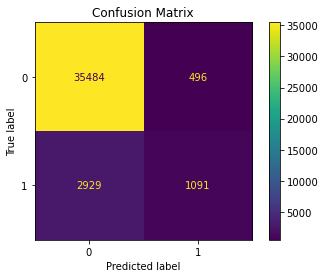

In [6]:
#Training the baseline model with best C value
base_model = LogisticRegression(C=10)
base_model.fit(x_train, y_train)

pred = base_model.predict(x_test)
pred_prob = base_model.predict_proba(x_test)

plot_results(y_test, pred, pred_prob)

### Advance Model - Random Forest Classifier and LightGBM Classifier

In [5]:
#Splitting the dataset into train and test dataset in the ratio of 80:20
y_true = df['target'].values
df_model = df.drop(['ID_code', 'target'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(df_model, y_true, stratify=y_true, test_size=0.2)

AUC of ROC curve is:  0.8138305208255554
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35980
           1       0.00      0.00      0.00      4020

    accuracy                           0.90     40000
   macro avg       0.45      0.50      0.47     40000
weighted avg       0.81      0.90      0.85     40000



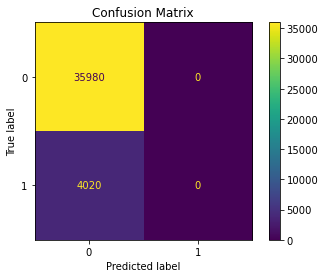

In [7]:
#Using Random Forest Classifier with default parameters
model_1 = RandomForestClassifier(n_jobs=-1)
model_1.fit(x_train, y_train)

pred = model_1.predict(x_test)
pred_prob = model_1.predict_proba(x_test)

plot_results(y_test, pred, pred_prob)

AUC of ROC curve is:  0.8610277061053819
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     35980
           1       0.86      0.09      0.17      4020

    accuracy                           0.91     40000
   macro avg       0.88      0.55      0.56     40000
weighted avg       0.90      0.91      0.87     40000



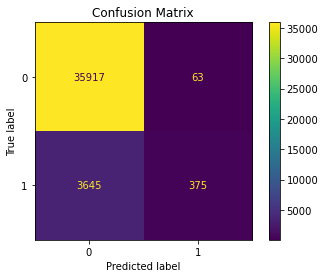

In [6]:
#Using LightGBM Classifier with default parameters
model_2 = LGBMClassifier()
model_2.fit(x_train, y_train, eval_metric='auc')

pred = model_2.predict(x_test)
pred_prob = model_2.predict_proba(x_test)

plot_results(y_test, pred, pred_prob)

In [7]:
#Hyper-parameter tuning for LightGBM CLassifier using Randomized Search
model_2 = LGBMClassifier()
params={
    'learning_rate':[0.01,0.05,0.1],
    'num_leaves':[30, 50, 70],
    'n_estimators':[500,750,1000],
    'colsample_bytree':[0.8, 0.9, 1],
    'subsample':[0.8, 0.9, 1]}

random_srch = RandomizedSearchCV(model_2, param_distributions=params, verbose=10, n_jobs=-1)
random_srch.fit(x_train,y_train)

print(random_srch.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'subsample': 0.8, 'num_leaves': 30, 'n_estimators': 750, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


AUC of ROC curve is:  0.8928254018954698
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     35980
           1       0.79      0.28      0.41      4020

    accuracy                           0.92     40000
   macro avg       0.86      0.63      0.68     40000
weighted avg       0.91      0.92      0.90     40000



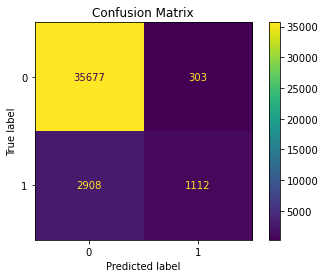

In [6]:
#Training lightGBM Classifier with tuned parameters
model_2 = LGBMClassifier(learning_rate=0.05, num_leaves=30, n_estimators=750, colsample_bytree=0.8, subsample=0.8)
model_2.fit(x_train, y_train, eval_metric='auc')

pred = model_2.predict(x_test)
pred_prob = model_2.predict_proba(x_test)

plot_results(y_test, pred, pred_prob)

In [7]:
joblib.dump(model_2, 'LGBM_BiClassifier.pkl')

['LGBM_BiClassifier.pkl']

In [8]:
model_2 = joblib.load('LGBM_BiClassifier.pkl')

AUC of ROC curve is:  0.7949146775848384
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     35980
           1       0.39      0.35      0.37      4020

    accuracy                           0.88     40000
   macro avg       0.66      0.65      0.65     40000
weighted avg       0.87      0.88      0.88     40000



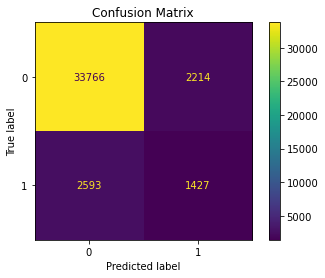

In [12]:
#Using SMOTE to create synthetic points for class 1
x_train_sm, y_train_sm = SMOTE().fit_resample(x_train, y_train)
model_2sm = LGBMClassifier(learning_rate=0.05, num_leaves=30, n_estimators=750, colsample_bytree=0.8, subsample=0.8)
model_2sm.fit(x_train_sm, y_train_sm, eval_metric='auc')

pred = model_2sm.predict(x_test)
pred_prob = model_2sm.predict_proba(x_test)

plot_results(y_test, pred, pred_prob)

AUC of ROC curve is:  0.7935184693541741
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     35980
           1       0.39      0.35      0.37      4020

    accuracy                           0.88     40000
   macro avg       0.66      0.65      0.65     40000
weighted avg       0.87      0.88      0.88     40000



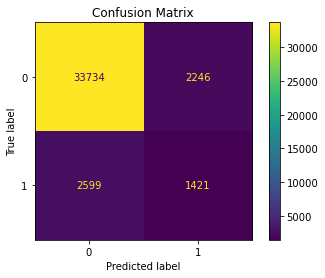

In [13]:
#Using SMOTE-TOMEK to create synthetic points for class 1
x_train_smT, y_train_smT = SMOTETomek().fit_resample(x_train, y_train)
model_2smT = LGBMClassifier(learning_rate=0.05, num_leaves=30, n_estimators=750, colsample_bytree=0.8, subsample=0.8)
model_2smT.fit(x_train_smT, y_train_smT, eval_metric='auc')

pred = model_2smT.predict(x_test)
pred_prob = model_2smT.predict_proba(x_test)

plot_results(y_test, pred, pred_prob)

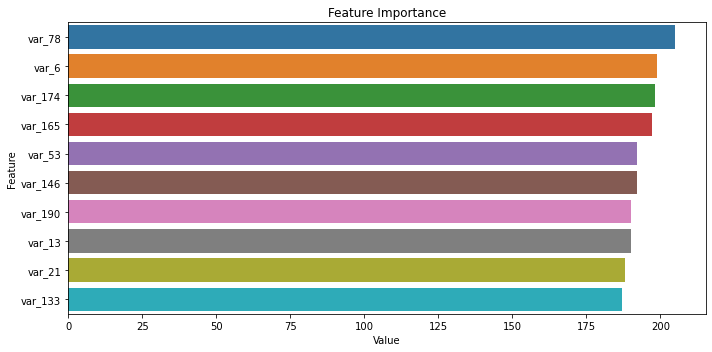

In [14]:
#Plotting feature importance in descending order of its importance
feature_imp = pd.DataFrame(sorted(zip(model_2.feature_importances_, df.columns[2:])), columns=['Value','Feature'])
feature_imp.sort_values(by="Value", ascending=False, inplace=True, ignore_index=True)
plt.figure(figsize=(10, 5))
sns.barplot(x="Value", y="Feature", data=feature_imp.iloc[:10])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

## Error Analysis

In [7]:
#Printing number of correctly classified and misclassified points
df_misclassified, df_correctly_classified = get_misclassified(df, x_test, y_test, pred)
print('No. of misclassified points: ', df_misclassified.shape[0])
print('No. of correctly classified points: ', df_correctly_classified.shape[0])

No. of misclassified points:  3152
No. of correctly classified points:  36848


100%|██████████| 5/5 [00:01<00:00,  4.29it/s]


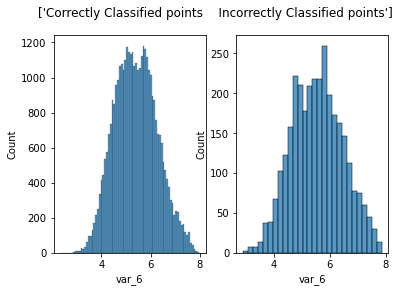

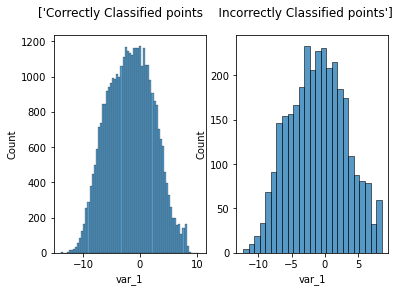

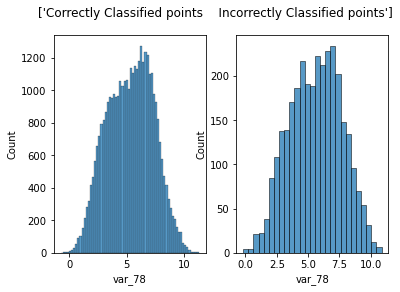

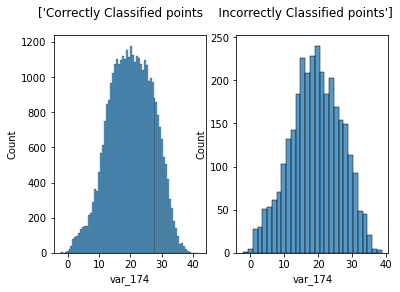

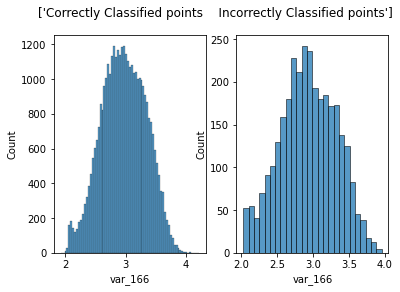

In [34]:
#checking for shift in distribution of top important features between error points and non-error points
for n in tqdm.tqdm(range(5)):
  fig, ax =plt.subplots(1,2)
  sns.histplot(df_correctly_classified[feature_imp.loc[n, 'Feature']], ax=ax[0])
  sns.histplot(df_misclassified[feature_imp.loc[n, 'Feature']], ax=ax[1])
  fig.suptitle(['Distribution of feature ', feature_imp.loc[n, 'Feature']])
  fig.suptitle(['Correctly Classified points    Incorrectly Classified points'])
  fig.show()

## Feature Engineering

In [9]:
ytrain_df = pd.DataFrame(y_train, columns=['target_true'])

In [10]:
#Predicting class labels for train set using tuned LightGBM model (model_2) 
predictions_on_xtrain = model_2.predict(x_train)
predictions_on_xtrain = pd.DataFrame(predictions_on_xtrain, columns=['target_predicted'])

In [11]:
#Predicting class probability for train set using tuned LightGBM model (model_2) 
predict_prob_on_xtrain = model_2.predict_proba(x_train)
predict_prob_on_xtrain = pd.DataFrame(predict_prob_on_xtrain, columns=['target=0', 'target=1'])
predict_prob_on_xtrain['prob'] = predict_prob_on_xtrain.max(axis=1)
predict_prob_on_xtrain.drop(['target=0', 'target=1'], axis=1, inplace=True)

In [12]:
#Creating new dataframe with y-true, y-predicted and y-predicted probability values
prediction_comb = pd.concat([ytrain_df, predictions_on_xtrain, predict_prob_on_xtrain], axis=1)

In [13]:
#Creating new class labels based on confidence/probability score of prediction
#The logic is as follows
#For every correctly classified points, if prob score is >=0.95, set 0 else 1
#For every misclassified points, if prob score is >=0.95, set 2 else 3
#New class labels refer to 
#0: Correctly classified with high confidence (C_high)
#1: Correctly classified with low confidence (C_low)
#2: In-Correctly classified with high confidence (W_high)
#3: In-Correctly classified with low confidence (W_low)

prediction_comb['target_new'] = np.where(prediction_comb['target_true']==prediction_comb['target_predicted'],
                                        np.where(prediction_comb['prob']>=0.95, 0, 1), 
                                        np.where(prediction_comb['prob']>=0.95, 2, 3))

In [14]:
#Printing values of new class labels
prediction_comb.target_new.unique()

array([0, 1, 3, 2])

In [15]:
y_new = prediction_comb['target_new']

In [14]:
#Hyper-parameter tuning for LightGBM CLassifier using Randomized Search
model_2_ = LGBMClassifier(objective='multi:softprob', metrics='multi_logloss')
params={
    'learning_rate':[0.01,0.05,0.1],
    'num_leaves':[30, 50, 70],
    'n_estimators':[500,750,1000],
    'colsample_bytree':[0.8, 0.9, 1],
    'subsample':[0.8, 0.9, 1]}

random_srch = RandomizedSearchCV(model_2_, param_distributions=params, verbose=10, n_jobs=-1)
random_srch.fit(x_train,y_new)

print(random_srch.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'subsample': 1, 'num_leaves': 30, 'n_estimators': 1000, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [16]:
#Training LightGBM Classifer on train set and new target value (y_new) with tuned parameters
#As there are 4 classes, our model is solving a multi-class classification task
model_2_ = LGBMClassifier(learning_rate=0.1, num_leaves=30, n_estimators=1000, colsample_bytree=0.8, subsample=1)
model_2_.fit(x_train, y_new)

LGBMClassifier(colsample_bytree=0.8, n_estimators=1000, num_leaves=30,
               subsample=1)

In [17]:
joblib.dump(model_2_, 'LGBM_MulClassifier.pkl')

['LGBM_MulClassifier.pkl']

In [18]:
model_2_=joblib.load('LGBM_MulClassifier.pkl')

In [19]:
#Function to compute and add new features using trained LightGBM model(model_2_) and PCA
def feature_engineering(model, x):
    
    x_df = pd.DataFrame(data = x, columns=df.columns[2:]).reset_index(drop=True)
    
    #Predicting 4 class probabilities using model_2_ and adding to train set
    predict_prob = model.predict_proba(x)
    predict_prob_df = pd.DataFrame(predict_prob, columns=['C_high', 'C_low', 'W_high', 'W_low'])
    df_pred = pd.concat([x_df, predict_prob_df], axis=1)
    
    #Standardizing and transforming the above dataframe using PCA to obtain top 5 components 
    df_pred_std = StandardScaler().fit_transform(df_pred)
    pca = PCA(n_components = 5)
    pca_comp = pca.fit_transform(df_pred_std)
    df_pca = pd.DataFrame(data=pca_comp, columns=("Component_1", "Component_2", "Component_3", "Component_4", "Component_5",))
    
    #Adding the top 5 components from PCA to new train set
    df_new = pd.concat([df_pred, df_pca], axis=1)
    
    return df_new

# Modeling with engineered features

In [20]:
#Function call (feature_engineering) to add new features to train set
df_train = feature_engineering(model_2_, x_train)
df_train.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0  12.6816  1.0190  12.1078  4.6545  11.2080  7.1044  5.2217  16.7251  7.1127   
1  16.6837 -0.4638   8.5834  4.0482  10.3463 -4.8354  5.8095  10.9070 -1.9326   
2  11.3727 -0.7277  10.3682  4.3151  10.6957  2.1104  5.3873  23.6329  5.0038   
3  13.1903  4.1214  13.6989  4.6089   9.9042  0.1665  5.8748  12.7668  0.6715   
4  10.4450  2.2301  13.6753  7.5764   8.7086 -5.7958  6.6405  20.6461 -1.1993   

    var_9  ...  var_199    C_high     C_low  W_high     W_low  Component_1  \
0  7.8485  ...  -9.9207  0.996120  0.003081     0.0  0.000799    -1.652500   
1  6.1765  ... -20.4727  0.012581  0.965603     0.0  0.021816     2.156231   
2  9.6030  ...  -5.4917  0.906662  0.082252     0.0  0.011085    -1.059246   
3  8.6419  ...  -9.7610  0.829768  0.135301     0.0  0.034931    -0.622682   
4  8.4610  ...  11.3236  0.978194  0.016693     0.0  0.005113    -1.189351   

   Component_2  Component_3  Component_4  Component_5  
0     0.119771     0.653768     0.695566     0.520055  
1    -0.818495    -0.866629     1.012214     0.363380  
2    -1.941189    -1.564670     0.587185     0.484275  
3    -0.331434     0.198804    -1.816876     2.790077  
4     0.416535    -0.881446    -1.578707    -0.312657  

[5 rows x 209 columns]

In [21]:
#Hyper-parameter tuning for LightGBM CLassifier using Randomized Search
model_2FE = LGBMClassifier()
params={
    'learning_rate':[0.01,0.05,0.1],
    'num_leaves':[30, 50, 70],
    'n_estimators':[500,750,1000],
    'colsample_bytree':[0.8, 0.9, 1],
    'subsample':[0.8, 0.9, 1]}

random_srch = RandomizedSearchCV(model_2FE, param_distributions=params, verbose=10, n_jobs=-1)
random_srch.fit(df_train, y_train)

print(random_srch.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'subsample': 1, 'num_leaves': 50, 'n_estimators': 500, 'learning_rate': 0.01, 'colsample_bytree': 0.9}


In [22]:
#Training LightGBM Classifier on new train dataset
model_2FE = LGBMClassifier(learning_rate=0.01, num_leaves=50, n_estimators=500, colsample_bytree=0.9, subsample=1)
model_2FE.fit(df_train, y_train, eval_metric='auc')

LGBMClassifier(colsample_bytree=0.9, learning_rate=0.01, n_estimators=500,
               num_leaves=50, subsample=1)

In [23]:
joblib.dump(model_2FE, 'LGBM_BiClassifierFE.pkl')

['LGBM_BiClassifierFE.pkl']

In [24]:
model_2FE = joblib.load('LGBM_BiClassifierFE.pkl')

In [25]:
#Function call (feature_engineering) to add new features to test set
df_test = feature_engineering(model_2_, x_test)
df_test.head()

var_0   var_1    var_2   var_3    var_4    var_5   var_6    var_7  \
0  15.9752 -0.2370  10.1713  8.3396  14.4406  -3.9924  4.7568  14.0966   
1  12.1292 -0.2266   9.2959  5.6437  13.9696 -10.3186  5.4257  13.0968   
2   7.2616  2.1180   9.5505  6.5689  12.0761   3.9943  4.3778  23.5259   
3   8.8539 -6.9104  12.1099  3.3224  12.0920   0.0771  5.1565  13.4150   
4  11.4101  3.4915   9.6043  6.7891   8.6330  -2.6196  4.5255  14.4933   

    var_8   var_9  ...  var_199    C_high     C_low         W_high     W_low  \
0  0.3029  7.5032  ...  -3.5359  0.190772  0.750680   0.000000e+00  0.058548   
1  2.7716  7.8280  ...   5.6266  0.985409  0.011182   0.000000e+00  0.003408   
2  0.8232  5.8749  ... -18.2751  0.999667  0.000194   0.000000e+00  0.000139   
3 -3.2815  8.1550  ...  -0.3750  0.999917  0.000054   0.000000e+00  0.000029   
4 -1.0908  6.9138  ...  -1.9515  0.319220  0.661278  5.080351e-141  0.019502   

   Component_1  Component_2  Component_3  Component_4  Component_5  
0     2.093195     1.217364     1.231004    -0.226202    -1.478225  
1    -1.552636     1.217811     0.285586     1.660657    -1.883151  
2    -1.795992    -0.373508    -0.325492    -1.019851    -1.061384  
3    -2.138979     1.005569     1.572896     0.493534    -1.483853  
4     0.987390    -1.193535    -0.707125    -0.875703    -1.668829  

[5 rows x 209 columns]

AUC of ROC curve is:  0.8716090752463365
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     35980
           1       0.55      0.38      0.45      4020

    accuracy                           0.91     40000
   macro avg       0.74      0.67      0.70     40000
weighted avg       0.90      0.91      0.90     40000



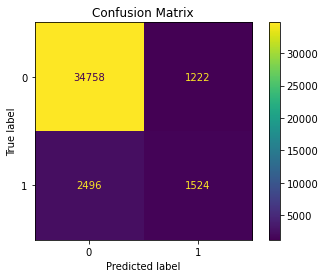

In [26]:
#Predicting class lables using the model trained on new train dataset and printing classification report
pred = model_2FE.predict(df_test)
pred_prob = model_2FE.predict_proba(df_test)

plot_results(y_test, pred, pred_prob)

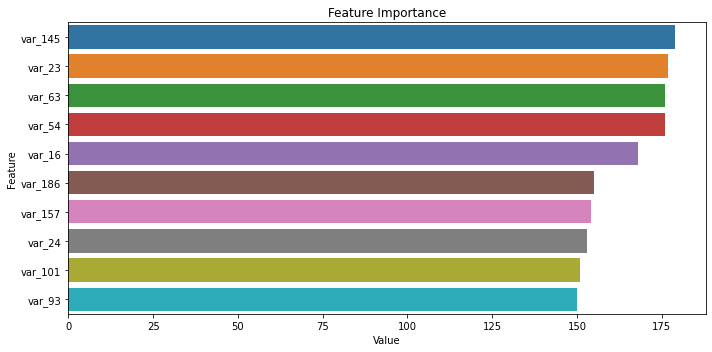

In [27]:
#Plotting feature importance in descending order of its importance
feature_imp = pd.DataFrame(sorted(zip(model_2FE.feature_importances_, df.columns[2:])), columns=['Value','Feature'])
feature_imp.sort_values(by="Value", ascending=False, inplace=True, ignore_index=True)
plt.figure(figsize=(10, 5))
sns.barplot(x="Value", y="Feature", data=feature_imp.iloc[:10])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Using Stacking Classifier

In [28]:
#Modeling a Stacking Classifier with Logistic Regression as meta-classifier
#Classifier 1: Tuned Logistic Regression
#Classifier 2: Tuned LightGBM Classifier
clf1 = LogisticRegression(C=10)
clf2 = LGBMClassifier(learning_rate=0.01, num_leaves=50, n_estimators=500, colsample_bytree=0.9, subsample=1)

model_3 = StackingClassifier(classifiers=[clf1, clf2], meta_classifier=LogisticRegression())
model_3.fit(df_train, y_train)

StackingClassifier(classifiers=[LogisticRegression(C=10),
                                LGBMClassifier(colsample_bytree=0.9,
                                               learning_rate=0.01,
                                               n_estimators=500, num_leaves=50,
                                               subsample=1)],
                   meta_classifier=LogisticRegression())

In [29]:
joblib.dump(model_3, 'Stacking_Classifier.pkl')

['Stacking_Classifier.pkl']

In [30]:
model_3 = joblib.load('Stacking_Classifier.pkl')

AUC of ROC curve is:  0.735011207165949
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     35980
           1       0.55      0.38      0.45      4020

    accuracy                           0.91     40000
   macro avg       0.74      0.67      0.70     40000
weighted avg       0.90      0.91      0.90     40000



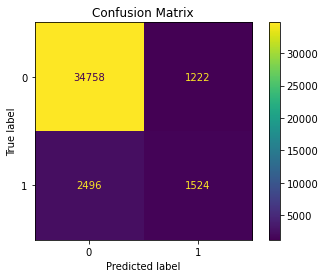

In [31]:
#Predicting class lables using Stacking Classifier and printing classification report
pred = model_3.predict(df_test)
pred_prob = model_3.predict_proba(df_test)

plot_results(y_test, pred, pred_prob)

## Using Deep Learning (MLP)

In [35]:
#Function to obtain best parameters
def best_hyper_parameters(unit1, unit2, unit3):
    
    model = Sequential()
    model.add(Dense(unit1, activation='relu', input_shape=(209,), kernel_initializer=HeNormal()))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(unit2, activation='relu', kernel_initializer=HeNormal()))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
              
    model.add(Dense(unit3, activation='relu', kernel_initializer=HeNormal()))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
              
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    
    return model

In [36]:
#Hyper-parameter tuning using wrapper(Keras Classifier) on Grid Search
params = {'unit1': [16, 32, 64, 128],
          'unit2': [16, 32, 64, 128],
          'unit3': [16, 32, 64, 128]
         }

model = KerasClassifier(build_fn=best_hyper_parameters)

grid_srch = GridSearchCV(estimator=model, param_grid=params, cv=3, n_jobs=-1)
grid_result = grid_srch.fit(df_train, y_train)

print(grid_result.best_params_)

5000/5000 [==============================] - 15s 3ms/step - loss: 0.3165 - auc: 0.7121
{'unit1': 16, 'unit2': 16, 'unit3': 16}


In [32]:
#Training MLP on train dataset with newly added features
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(209,), kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.5))
              
model.add(Dense(16, activation='relu', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
              
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.fit(df_train, y_train, validation_split=0.2, verbose=2, epochs=100, callbacks=[es_callback])

Epoch 1/100
4000/4000 - 12s - loss: 0.3667 - auc: 0.5765 - val_loss: 0.2850 - val_auc: 0.8640 - 12s/epoch - 3ms/step
Epoch 2/100
4000/4000 - 10s - loss: 0.2464 - auc: 0.8544 - val_loss: 0.1834 - val_auc: 0.9427 - 10s/epoch - 3ms/step
Epoch 3/100
4000/4000 - 10s - loss: 0.2007 - auc: 0.9143 - val_loss: 0.1554 - val_auc: 0.9668 - 10s/epoch - 3ms/step
Epoch 4/100
4000/4000 - 10s - loss: 0.1814 - auc: 0.9316 - val_loss: 0.1435 - val_auc: 0.9691 - 10s/epoch - 3ms/step
Epoch 5/100
4000/4000 - 10s - loss: 0.1727 - auc: 0.9387 - val_loss: 0.1257 - val_auc: 0.9703 - 10s/epoch - 2ms/step
Epoch 6/100
4000/4000 - 10s - loss: 0.1693 - auc: 0.9414 - val_loss: 0.1268 - val_auc: 0.9691 - 10s/epoch - 3ms/step
Epoch 7/100
4000/4000 - 12s - loss: 0.1656 - auc: 0.9432 - val_loss: 0.1207 - val_auc: 0.9706 - 12s/epoch - 3ms/step
Epoch 8/100
4000/4000 - 11s - loss: 0.1648 - auc: 0.9443 - val_loss: 0.1841 - val_auc: 0.9628 - 11s/epoch - 3ms/step
Epoch 9/100
4000/4000 - 11s - loss: 0.1628 - auc: 0.9455 - val_l

In [33]:
joblib.dump(model, 'Sequential.pkl')

INFO:tensorflow:Assets written to: ram://6ab4e150-c4ea-4815-af27-55da12d332ee/assets


['Sequential.pkl']

AUC of ROC curve is:  0.8453364465886244
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     35980
           1       0.44      0.26      0.32      4020

    accuracy                           0.89     40000
   macro avg       0.68      0.61      0.63     40000
weighted avg       0.87      0.89      0.88     40000



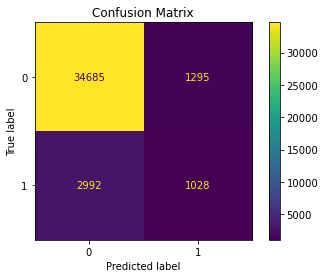

In [33]:
#Predicting class lables using the model trained on new train dataset and printing classification report
pred = (model.predict(df_test) > 0.5).astype("int32")

def predict_probability(number):
  return [1-number[0], number[0]]

pred_prob = np.array(list(map(predict_probability, model.predict(df_test))))

plot_results(y_test, pred, pred_prob)

In [35]:
#Training MLP on train dataset without newly added features
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(200,), kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.5))
              
model.add(Dense(16, activation='relu', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
              
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.fit(x_train, y_train, validation_split=0.2, verbose=2, epochs=100, callbacks=[es_callback])

Epoch 1/100
4000/4000 - 12s - loss: 0.3708 - auc: 0.5455 - val_loss: 0.2788 - val_auc: 0.8046 - 12s/epoch - 3ms/step
Epoch 2/100
4000/4000 - 10s - loss: 0.2858 - auc: 0.7617 - val_loss: 0.2478 - val_auc: 0.8406 - 10s/epoch - 3ms/step
Epoch 3/100
4000/4000 - 11s - loss: 0.2702 - auc: 0.7989 - val_loss: 0.2432 - val_auc: 0.8474 - 11s/epoch - 3ms/step
Epoch 4/100
4000/4000 - 12s - loss: 0.2665 - auc: 0.8063 - val_loss: 0.2391 - val_auc: 0.8509 - 12s/epoch - 3ms/step
Epoch 5/100
4000/4000 - 12s - loss: 0.2624 - auc: 0.8137 - val_loss: 0.2362 - val_auc: 0.8540 - 12s/epoch - 3ms/step
Epoch 6/100
4000/4000 - 11s - loss: 0.2619 - auc: 0.8144 - val_loss: 0.2373 - val_auc: 0.8547 - 11s/epoch - 3ms/step
Epoch 7/100
4000/4000 - 10s - loss: 0.2618 - auc: 0.8148 - val_loss: 0.2359 - val_auc: 0.8571 - 10s/epoch - 2ms/step
Epoch 8/100
4000/4000 - 10s - loss: 0.2592 - auc: 0.8195 - val_loss: 0.2357 - val_auc: 0.8555 - 10s/epoch - 2ms/step
Epoch 9/100
4000/4000 - 10s - loss: 0.2593 - auc: 0.8201 - val_l

AUC of ROC curve is:  0.8559816848221372
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     35980
           1       0.83      0.11      0.19      4020

    accuracy                           0.91     40000
   macro avg       0.87      0.55      0.57     40000
weighted avg       0.90      0.91      0.87     40000



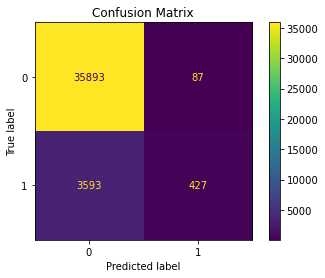

In [38]:
#Predicting class lables using the model trained on train dataset and printing classification report
pred = (model.predict(x_test) > 0.5).astype("int32")

def predict_probability(number):
  return [1-number[0], number[0]]

pred_prob = np.array(list(map(predict_probability, model.predict(x_test))))

plot_results(y_test, pred, pred_prob)